# Колебательные процессы 
Говоря о колебаниях, мы имеем в виду движения, явления, процессы, обладающие свойством хотя бы приблизительной повторяемости во времени. Объект  той  или  иной  физической  природы,  в  котором реализуется  колебательный процесс, называют колебательной системой.

Можно  было  бы  привести  множество  примеров,  иллюстрирующих важность колебательных явлений в технических устройствах. В одних случаях колебания вредны (именно эти случаи впервые привлекли внимание инженеров к проблемам теории колебаний), в других случаях они приносят пользу и  целенаправленно применяются в современной технике.

Большинство  современных  технических  сооружений, различных приборов, инструментов, различных механизмов представляют собой сложные системы,  основу  которых  представляют  колебательные  конструкции, скомпонованные из стержневых и тонкостенных элементов, изготовленных из материалов,  которые  в  пределах  достаточно  малых  деформаций  могут рассматриваться как упругие.

При различных воздействиях на данные конструкции, например ударом, в них могут возникнуть так называемые свободные колебания. Под свободными колебаниями  понимают периодические  упругие  колебания  элементов конструкции,  возникающие  после  внешнего  однократного  толчка и протекающие в изолированной системе. В этом случае характер колебаний определяется только внутренним строением системы, зависящим от ее массы, характеристик  демпфирования  и  упругости.  Кроме  того,  в  колебательной системе  могут  возникать  вынужденные  колебания, т.е.  периодические колебания элементов конструкции, возникающие под воздействием внешней силы  и  поддерживаемые  ею.  Характер  таких  колебаний  определяется  как внешней силой, так и физическими параметрами самой системы.

Если колебательные смещения частиц стержня направлены вдоль его оси, то говорят о продольных колебаниях. Но так как поперечные колебания легче визуализировать, то в качестве примера далее будет разобрано решение уравнения поперечных колебаний струны
$$\frac{\partial^2 U}{\partial^2 t} = a^2\frac{\partial^2 U}{\partial^2 x}$$Начальные условия: $$U(x,0)=f(x), \frac{\partial U}{\partial t}(x,0) = 0, 0 \leq x \leq 1$$Нулевые граничные условия:$$U(0,t)=U(1,t)=0$$

Подключим необходимые для работы библиотеки:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

Далее, для того чтобы воспользоваться разностной схемой решения, зададим необходимые константы

In [11]:
h = 0.1 #шаг по x
t = 0.05 #шаг по t
a = 1 #отношение начального натяжения T к массе единице длины
l = (a * t / h) ** 2 #расчётный коэффициент
n = 11 #сетка из 11 узлов по x (i = 0, 1, ... 10)
m = 17 #провести вычисления для 16 слоев по t (j = 0, 1, ... 16)
x = [h*i for i in range(0,n)] # координата x
U = np.zeros([m,n]) # матрица для размещения расчётных значений


Внесём заданные начальные и граничные условия в объявленную матрицу U

In [12]:
for j in range(0,m):
     for i in range(0,n):
              U[0,i]=x[i]*(x[i]**2-1) #начальные условия
              U[1,i]=U[0,i] #начальные условия
              U[j,0]=0 #граничные условия
              U[j,10]=0 #граничные условия


После чего рассчитаем решение данного уравнения с заданным шагом по х на заданном временном промежутке

In [13]:
for j in range(1, m-1):
   for i in range(1, n-1):
           U[j+1,i]=2 * (1 - l) * U[j,i]+l * (U[j,i+1] + U[j,i-1]) - U[j-1,i]

И выведем полученное решение в виде графика

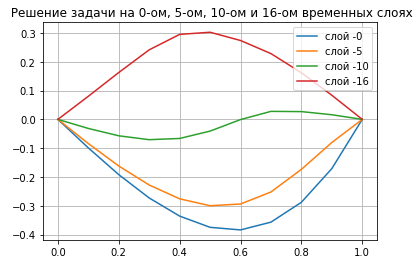

In [14]:
y0=[]
y5=[]
y10=[]
y16=[]
for i in range(0,n):
     y0.append(U[0,i])
     y5.append(U[5,i])
     y10.append(U[10,i])
     y16.append(U[16,i])
plt.title(' Решение задачи на 0-ом, 5-ом, 10-ом и 16-ом временных слоях', size=12)
plt.plot(x, y0, label='слой -0')
plt.plot(x, y5, label='слой -5')
plt.plot(x, y10, label='слой -10')
plt.plot(x, y16, label='слой -16')
plt.legend()
plt.grid()
plt.show()